In [1]:
import pboxplots
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import pickle 

import warnings
warnings.filterwarnings("ignore")

## Preprocess data

In [2]:
#airbnb
df = pd.read_csv('data/AB_NYC_2019.csv')
price = []
for i in df.price:
    if pd.isnull(i):
        price.append(None)
    else:
        price.append(int(i))
df['price'] = price
df = df.dropna(subset = 'price')
df = df[df['price']<500]
df = df[df.minimum_nights<10]
med = np.median(df['minimum_nights'])

df['Minimum nights'] = ['high' if i>med else 'low' for i in df.minimum_nights]
df = df.rename(columns = {'neighbourhood_group':'Borough', 'room_type': 'Room type', 'price':'Price'})
df = df[['Price','Room type','Minimum nights', 'Borough']]
df.shape

(40738, 4)

## Case study 1

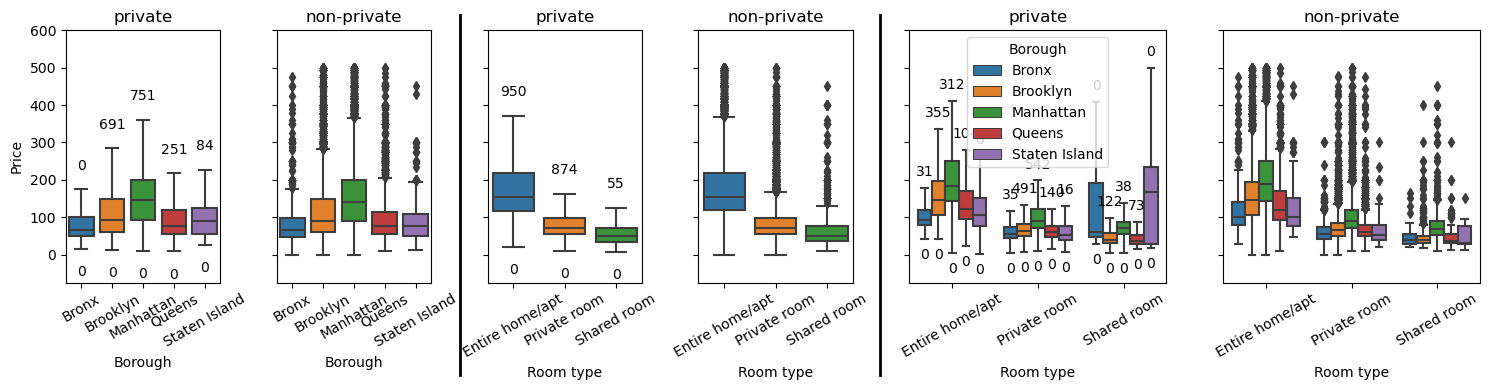

In [6]:
seed = 0
numboxplots = [5, 3, 15]
eps = 1

df = df.sort_values(['Room type','Borough'])
fig, axs = plt.subplots(nrows=1, ncols=6, figsize=(15, 4),
                        sharex='col', sharey = 'row', gridspec_kw={'width_ratios': [0.6,0.6,.6,.6, 1, 1]})


pboxplots.pboxplot(df, x='Borough', y='Price', bounds = (0,500), eps=eps/np.sum(numboxplots)*numboxplots[0], seed = seed, ax = axs[0])
axs[0].set_title('private')
axs[0].set_ylim([-75,600])
axs[0].tick_params(axis='x', rotation=30)

sns.boxplot(df, x = 'Borough', y = 'Price', ax = axs[1])
axs[1].set_title('non-private')
axs[1].set_ylim([-75,600])
axs[1].set_ylabel('')
axs[1].tick_params(axis='x', rotation=30)

pboxplots.pboxplot(df, x = 'Room type', y = 'Price', bounds = (0,500), eps=eps/np.sum(numboxplots)*numboxplots[1], seed = seed, ax = axs[2])
axs[2].set_title('private')
axs[2].set_ylim([-75,600])
axs[2].set_ylabel('')
axs[2].tick_params(axis='x', rotation=30)

sns.boxplot(df, x = 'Room type', y = 'Price', ax = axs[3])
axs[3].set_title('non-private')
axs[3].set_ylim([-75,600])
axs[3].set_ylabel('')
axs[3].tick_params(axis='x', rotation=30)

pboxplots.pboxplot(df, x = 'Room type', y = 'Price', hue = 'Borough', bounds = (0,500), eps=eps/np.sum(numboxplots)*numboxplots[2], seed = seed, ax = axs[4])
axs[4].set_title('private')
axs[4].set_ylim([-75,600])
axs[4].set_ylabel('')

axs[4].tick_params(axis='x', rotation=30)

sns.boxplot(df, x = 'Room type', y = 'Price', hue = 'Borough', ax = axs[5])
axs[5].set_title('non-private')
axs[5].set_ylim([-75,600])
axs[5].set_ylabel('')
axs[5].legend().set_visible(False)
axs[5].tick_params(axis='x', rotation=30)

plt.subplots_adjust(wspace=-.25)
plt.tight_layout()

from matplotlib.lines import Line2D 
line_x_position =0.31
line = Line2D([line_x_position, line_x_position], [0.05, 0.95], transform=fig.transFigure, color="black", linewidth=2)
fig.add_artist(line)

line_x_position =0.59
line = Line2D([line_x_position, line_x_position], [0.05, 0.95], transform=fig.transFigure, color="black", linewidth=2)
fig.add_artist(line)

plt.savefig('generated_figures/real_data_borough.pdf')
plt.show()


## Case study 2

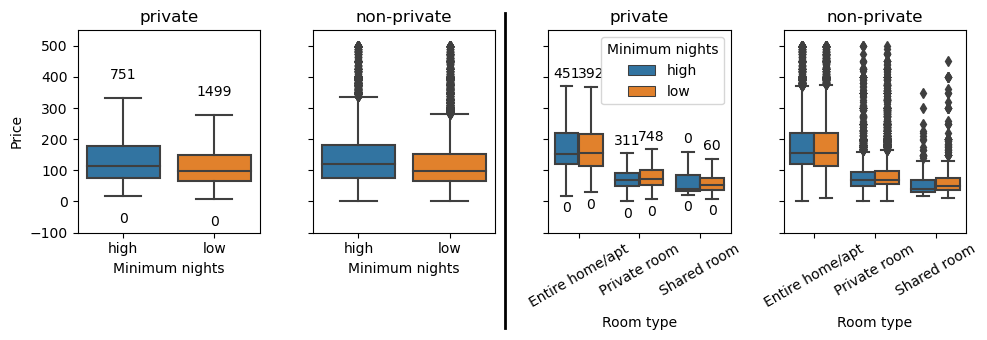

In [7]:
numboxplots = [2, 6]
eps = 1
seed = 0

df = df.sort_values(['Room type','Minimum nights'])

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(10, 3.5),
                        sharex='col', sharey = 'row', gridspec_kw={'width_ratios': [1,1,1,1]})

pboxplots.pboxplot(df, x='Minimum nights', y='Price', bounds = (0,500), eps=eps/np.sum(numboxplots)*numboxplots[0], seed = seed, ax = axs[0])
axs[0].set_title('private')
axs[0].set_ylim([-100,550])

sns.boxplot(df, x = 'Minimum nights', y = 'Price', ax = axs[1])
axs[1].set_title('non-private')
axs[1].set_ylabel('')
axs[1].set_ylim([-100,550])

pboxplots.pboxplot(df, hue = 'Minimum nights', y = 'Price', x = 'Room type', bounds = (0,500), eps=eps/np.sum(numboxplots)*numboxplots[1], seed = seed, ax = axs[2])
axs[2].set_title('private')
axs[2].tick_params(axis='x', rotation=30)
axs[2].set_ylabel('')
axs[2].set_ylim([-100,550])

sns.boxplot(df, hue = 'Minimum nights', y = 'Price', x = 'Room type', ax = axs[3])
axs[3].legend().set_visible(False)
axs[3].set_title('non-private')
axs[3].tick_params(axis='x', rotation=30)
axs[3].set_ylabel('')
axs[3].set_ylim([-100,550])


plt.tight_layout()

from matplotlib.lines import Line2D 
line_x_position =0.51
line = Line2D([line_x_position, line_x_position], [0.05, 0.95], transform=fig.transFigure, color="black", linewidth=2)
fig.add_artist(line)

plt.savefig('generated_figures/real_data_nights.pdf')
plt.show()

warning
warning


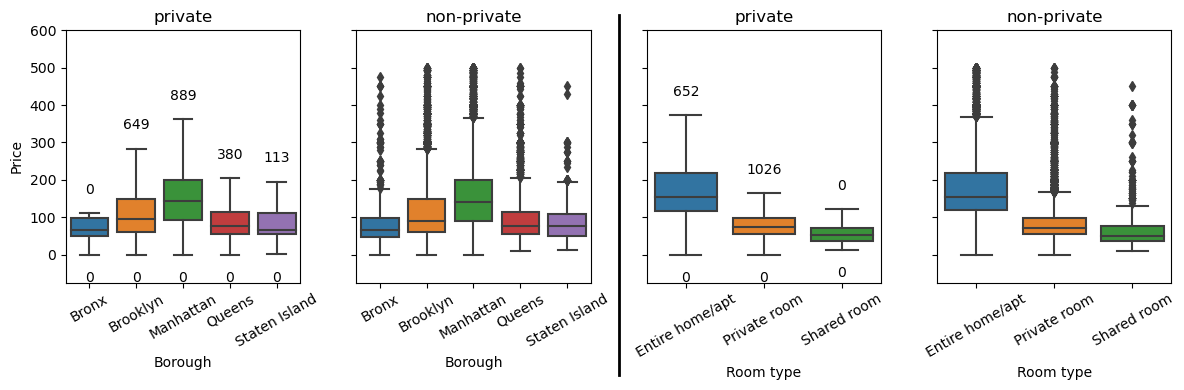

warning
warning
warning
warning
warning
warning
warning
warning
warning


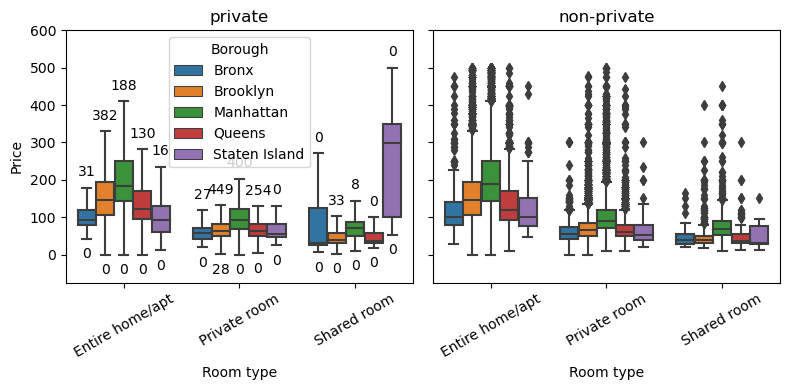

In [9]:
seed = 0
numboxplots = [5, 3, 15]
eps = 1

df = df.sort_values(['Room type','Borough'])
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(12, 4),
                        sharex='col', sharey = 'row')


pboxplots.pboxplot(df, x='Borough', y='Price', bounds = (0,500), eps=eps/np.sum(numboxplots)*numboxplots[0], seed = seed, ax = axs[0])
axs[0].set_title('private')
axs[0].set_ylim([-75,600])
axs[0].tick_params(axis='x', rotation=30)

sns.boxplot(df, x = 'Borough', y = 'Price', ax = axs[1])
axs[1].set_title('non-private')
axs[1].set_ylim([-75,600])
axs[1].set_ylabel('')
axs[1].tick_params(axis='x', rotation=30)

pboxplots.pboxplot(df, x = 'Room type', y = 'Price', bounds = (0,500), eps=eps/np.sum(numboxplots)*numboxplots[1], seed = seed, ax = axs[2])
axs[2].set_title('private')
axs[2].set_ylim([-75,600])
axs[2].set_ylabel('')
axs[2].tick_params(axis='x', rotation=30)

sns.boxplot(df, x = 'Room type', y = 'Price', ax = axs[3])
axs[3].set_title('non-private')
axs[3].set_ylim([-75,600])
axs[3].set_ylabel('')
axs[3].tick_params(axis='x', rotation=30)


from matplotlib.lines import Line2D 
line_x_position =0.52
line = Line2D([line_x_position, line_x_position], [0.05, 0.95], transform=fig.transFigure, color="black", linewidth=2)
fig.add_artist(line)

plt.tight_layout()
plt.savefig('generated_figures/slides_real_data_borough_1.pdf')
plt.show()

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 4),
                        sharex='col', sharey = 'row')

pboxplots.pboxplot(df, x = 'Room type', y = 'Price', hue = 'Borough', bounds = (0,500), eps=eps/np.sum(numboxplots)*numboxplots[2], seed = seed, ax = axs[0])
axs[0].set_title('private')
axs[0].set_ylim([-75,600])

axs[0].tick_params(axis='x', rotation=30)

sns.boxplot(df, x = 'Room type', y = 'Price', hue = 'Borough', ax = axs[1])
axs[1].set_title('non-private')
axs[1].set_ylim([-75,600])
axs[1].set_ylabel('')
axs[1].legend().set_visible(False)
axs[1].tick_params(axis='x', rotation=30)

plt.subplots_adjust(wspace=-.25)
plt.tight_layout()


plt.savefig('generated_figures/slides_real_data_borough_2.pdf')
plt.show()